# Import libraries

In [54]:
# import the required modules
import pandas as pd
import requests
import sys
from datetime import date, timedelta

# Import Data

In [5]:
# specify the endpoint
endpoint = "https://opendata.rdw.nl/resource/m9d7-ebf2.json?merk=VOLKSWAGEN&$limit=50000"

In [7]:
# execute the request
response = requests.get(endpoint)

In [8]:
# check the status code
if response.status_code != 200:
    print("Something went wrong")
    sys.exit()

In [10]:
# get the data from the response
data = response.json()

In [16]:
# convert the data to a Pandas DataFrame
df_data = pd.DataFrame(data)

In [17]:
# show the data
df_data.head()

,kenteken,voertuigsoort,merk,handelsbenaming,datum_tenaamstelling,inrichting,aantal_zitplaatsen,eerste_kleur,tweede_kleur,aantal_cilinders,...,bruto_bpm,zuinigheidsclassificatie,catalogusprijs,type_gasinstallatie,maximale_constructiesnelheid,hoogte_voertuig,oplegger_geremd,afwijkende_maximum_snelheid,aerodyn_voorz,verl_cab_ind
0,0002VK,Personenauto,VOLKSWAGEN,135031 M560,20230313,sedan,4,GROEN,Niet geregistreerd,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0002XK,Personenauto,VOLKSWAGEN,113021,20200706,Niet geregistreerd,NaN,ROOD,Niet geregistreerd,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0007XK,Personenauto,VOLKSWAGEN,113021,19950522,Niet geregistreerd,NaN,GROEN,Niet geregistreerd,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0008NU,Personenauto,VOLKSWAGEN,117031,20121017,Niet geregistreerd,NaN,BEIGE,Niet geregistreerd,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0009NN,Personenauto,VOLKSWAGEN,111011,19830823,Niet geregistreerd,NaN,WIT,Niet geregistreerd,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Clean and explore the data

In [18]:
# check the dimensions
df_data.shape

(50000, 74)

In [19]:
# technical information about the dataset
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 74 columns):
 #   Column                                                    Non-Null Count  Dtype 
---  ------                                                    --------------  ----- 
 0   kenteken                                                  50000 non-null  object
 1   voertuigsoort                                             50000 non-null  object
 2   merk                                                      50000 non-null  object
 3   handelsbenaming                                           49976 non-null  object
 4   datum_tenaamstelling                                      45650 non-null  object
 5   inrichting                                                50000 non-null  object
 6   aantal_zitplaatsen                                        46150 non-null  object
 7   eerste_kleur                                              50000 non-null  object
 8   tweede_kleur              

In [28]:
# specify the columns we want to use
selected_columns = ['merk', 'handelsbenaming', 'eerste_kleur', 'datum_tenaamstelling', 'aantal_cilinders', 'catalogusprijs', 'bruto_bpm']

# only select the specified columns
df_data_filtered = df_data[selected_columns]

# show the result
df_data_filtered.head()

,merk,handelsbenaming,eerste_kleur,datum_tenaamstelling,aantal_cilinders,catalogusprijs,bruto_bpm
0,VOLKSWAGEN,135031 M560,GROEN,20230313,4,NaN,NaN
1,VOLKSWAGEN,113021,ROOD,20200706,4,NaN,NaN
2,VOLKSWAGEN,113021,GROEN,19950522,4,NaN,NaN
3,VOLKSWAGEN,117031,BEIGE,20121017,4,NaN,NaN
4,VOLKSWAGEN,111011,WIT,19830823,4,NaN,NaN


In [29]:
# only specify the data types
df_data_filtered.dtypes

merk                    object
handelsbenaming         object
eerste_kleur            object
datum_tenaamstelling    object
aantal_cilinders        object
catalogusprijs          object
bruto_bpm               object
dtype: object

In [32]:
# deal with the NaN values
numeric_columns = ['aantal_cilinders', 'catalogusprijs', 'bruto_bpm']

# loop through the numeric types
for column in numeric_columns:
    df_data_filtered[column] = df_data_filtered[column].fillna(0)

# checkout the result
df_data_filtered[numeric_columns].head()

/var/folders/ds/njs8n39s3nq3v_q1_vxpq1zc0000gn/T/ipykernel_36470/23107006.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_data_filtered[column] = df_data_filtered[column].fillna(0)


,aantal_cilinders,catalogusprijs,bruto_bpm
0,4,0,0
1,4,0,0
2,4,0,0
3,4,0,0
4,4,0,0


In [33]:
# specify the right types
df_data_filtered['aantal_cilinders'] = df_data_filtered['aantal_cilinders'].astype(int)
df_data_filtered.head()

/var/folders/ds/njs8n39s3nq3v_q1_vxpq1zc0000gn/T/ipykernel_36470/229739844.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_data_filtered['aantal_cilinders'] = df_data_filtered['aantal_cilinders'].astype(int)


,merk,handelsbenaming,eerste_kleur,datum_tenaamstelling,aantal_cilinders,catalogusprijs,bruto_bpm
0,VOLKSWAGEN,135031 M560,GROEN,20230313,4,0,0
1,VOLKSWAGEN,113021,ROOD,20200706,4,0,0
2,VOLKSWAGEN,113021,GROEN,19950522,4,0,0
3,VOLKSWAGEN,117031,BEIGE,20121017,4,0,0
4,VOLKSWAGEN,111011,WIT,19830823,4,0,0


In [34]:
# check out the change of dtype
df_data_filtered.dtypes

merk                    object
handelsbenaming         object
eerste_kleur            object
datum_tenaamstelling    object
aantal_cilinders         int64
catalogusprijs          object
bruto_bpm               object
dtype: object

In [35]:
# specify the float columns
float_columns = ['bruto_bpm', 'catalogusprijs']

# conver the columns to float
for column in float_columns:
    df_data_filtered[column] = df_data_filtered[column].astype(float)

# show the dtypes
df_data_filtered.dtypes

/var/folders/ds/njs8n39s3nq3v_q1_vxpq1zc0000gn/T/ipykernel_36470/714265081.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_data_filtered[column] = df_data_filtered[column].astype(float)
/var/folders/ds/njs8n39s3nq3v_q1_vxpq1zc0000gn/T/ipykernel_36470/714265081.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_data_filtered[column] = df_data_filtered[column].astype(float)


merk                     object
handelsbenaming          object
eerste_kleur             object
datum_tenaamstelling     object
aantal_cilinders          int64
catalogusprijs          float64
bruto_bpm               float64
dtype: object

In [38]:
df_data_filtered['datum_tenaamstelling'] = pd.to_datetime(df_data_filtered['datum_tenaamstelling'], format="%Y%m%d")

/var/folders/ds/njs8n39s3nq3v_q1_vxpq1zc0000gn/T/ipykernel_36470/2880199880.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_data_filtered['datum_tenaamstelling'] = pd.to_datetime(df_data_filtered['datum_tenaamstelling'], format="%Y%m%d")


In [39]:
df_data_filtered.dtypes

merk                            object
handelsbenaming                 object
eerste_kleur                    object
datum_tenaamstelling    datetime64[ns]
aantal_cilinders                 int64
catalogusprijs                 float64
bruto_bpm                      float64
dtype: object

In [59]:
# datumvelden
df_data_filtered['jaar_tenaamstelling'] = df_data_filtered['datum_tenaamstelling'].dt.year
df_data_filtered['maand_tenaamstelling'] = df_data_filtered['datum_tenaamstelling'].dt.strftime("%B")
df_data_filtered['dag_tenaamstelling'] = df_data_filtered['datum_tenaamstelling'].dt.strftime("%A")
df_data_filtered.dtypes

merk                            object
handelsbenaming                 object
eerste_kleur                    object
datum_tenaamstelling    datetime64[ns]
aantal_cilinders                 int64
catalogusprijs                 float64
bruto_bpm                      float64
jaar_tenaamstelling            float64
maand_tenaamstelling            object
dag_tenaamstelling              object
dtype: object

In [84]:
# calculate the age of the car
from datetime import date, timedelta

today_date = date.today()

df_data_filtered['dagen_op_naam'] = pd.to_timedelta(today_date -  df_data_filtered['datum_tenaamstelling'].dt.date).dt.days
df_data_filtered.head()

,merk,handelsbenaming,eerste_kleur,datum_tenaamstelling,aantal_cilinders,catalogusprijs,bruto_bpm,jaar_tenaamstelling,maand_tenaamstelling,dag_tenaamstelling,dagen_op_naam
100,VOLKSWAGEN,TIGUAN,GRIJS,2023-02-15,4,40381.0,10116.0,2023.0,February,Wednesday,295.0
101,VOLKSWAGEN,FOX,GRIJS,2009-07-10,3,10374.0,1656.0,2009.0,July,Friday,5263.0
102,VOLKSWAGEN,PASSAT,GRIJS,NaT,4,33495.0,7203.0,NaN,NaN,NaN,NaN
103,VOLKSWAGEN,PASSAT,BRUIN,NaT,4,42745.0,10772.0,NaN,NaN,NaN,NaN
104,VOLKSWAGEN,PASSAT,GRIJS,NaT,4,33926.0,6800.0,NaN,NaN,NaN,NaN


In [65]:
df_data_filtered['datum_tenaamstelling'].dt.date.values[0]

datetime.date(2023, 2, 15)

In [52]:
# filter out the rows without price
df_data_filtered = df_data_filtered.query("catalogusprijs > 0")

In [53]:
df_data_filtered

,merk,handelsbenaming,eerste_kleur,datum_tenaamstelling,aantal_cilinders,catalogusprijs,bruto_bpm,jaar_tenaamstelling,maand_tenaamstelling,dag_tenaamstelling
100,VOLKSWAGEN,TIGUAN,GRIJS,2023-02-15,4,40381.0,10116.0,2023.0,February,Wednesday
101,VOLKSWAGEN,FOX,GRIJS,2009-07-10,3,10374.0,1656.0,2009.0,July,Friday
102,VOLKSWAGEN,PASSAT,GRIJS,NaT,4,33495.0,7203.0,NaN,NaN,NaN
103,VOLKSWAGEN,PASSAT,BRUIN,NaT,4,42745.0,10772.0,NaN,NaN,NaN
104,VOLKSWAGEN,PASSAT,GRIJS,NaT,4,33926.0,6800.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
49994,VOLKSWAGEN,POLO,GRIJS,2021-08-07,3,18176.0,0.0,2021.0,August,Saturday
49995,VOLKSWAGEN,POLO,ZWART,2021-08-31,3,18859.0,0.0,2021.0,August,Tuesday
49996,VOLKSWAGEN,POLO,ZWART,NaT,3,18315.0,0.0,NaN,NaN,NaN
49997,VOLKSWAGEN,POLO,WIT,2022-11-12,3,17315.0,0.0,2022.0,November,Saturday


<Axes: xlabel='eerste_kleur'>

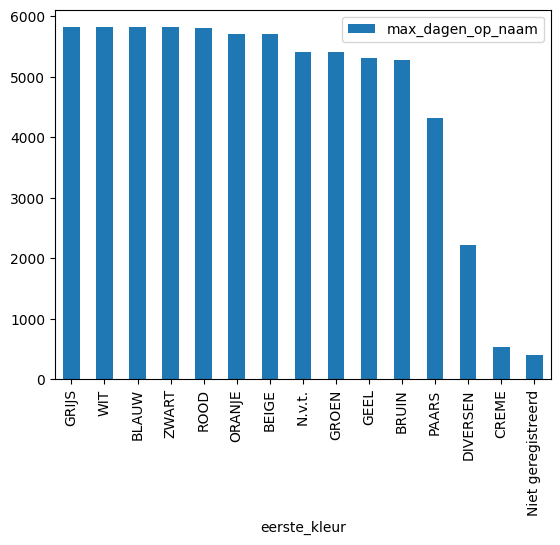

In [95]:
# Grouperen en aggregeren
selected_columns = ['handelsbenaming', 'eerste_kleur', 'catalogusprijs', 'dagen_op_naam']

df_data_grouped = (
    df_data_filtered[selected_columns]
    .groupby(['eerste_kleur'])
    .agg({"catalogusprijs": "mean", "dagen_op_naam": "max"})
    .rename(columns={"catalogusprijs": "mean_catalogusprijs",
                     "dagen_op_naam": "max_dagen_op_naam"})
    .sort_values(by="max_dagen_op_naam", ascending=False)
    .reset_index()
    .plot
    .bar(x="eerste_kleur", y="max_dagen_op_naam")
)

df_data_grouped

In [91]:
!pip install matplotlib

  Using cached matplotlib-3.8.2-cp312-cp312-macosx_11_0_arm64.whl.metadata (5.8 kB)
  Using cached contourpy-1.2.0-cp312-cp312-macosx_11_0_arm64.whl.metadata (5.8 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached fonttools-4.46.0-cp312-cp312-macosx_10_9_universal2.whl.metadata (156 kB)
  Using cached kiwisolver-1.4.5-cp312-cp312-macosx_11_0_arm64.whl.metadata (6.4 kB)
  Using cached Pillow-10.1.0-cp312-cp312-macosx_11_0_arm64.whl.metadata (9.5 kB)
  Using cached pyparsing-3.1.1-py3-none-any.whl.metadata (5.1 kB)
Using cached matplotlib-3.8.2-cp312-cp312-macosx_11_0_arm64.whl (7.5 MB)
Using cached contourpy-1.2.0-cp312-cp312-macosx_11_0_arm64.whl (242 kB)
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
Using cached fonttools-4.46.0-cp312-cp312-macosx_10_9_universal2.whl (2.8 MB)
Using cached kiwisolver-1.4.5-cp312-cp312-macosx_11_0_arm64.whl (64 kB)
Using cached Pillow-10.1.0-cp312-cp312-macosx_11_0_arm64.whl (3.3 MB)
Using cached pyparsing-3.1.1-py